In [1]:
from lsys import Lsys

L-systemとはなにか、というのを知りたい方は [aidiary](http://aidiary.hatenablog.com/entry/20131125/1385385271)や
[Wikipedia](https://ja.wikipedia.org/wiki/L-system)を参照ください。
初期状態と変換ルールを与えて、変換ルールを複数回反映させるとフラクタルが生成されるというものです。
本ライブラリはL-systemを使ったタートルグラフィックスに特化しています。

Lsysに渡す引数は、初期文字列と変換ルールです。文字列の意味は下記です。
- F,A,Bはすべて進みながら描画
- f,a,b は描画せず進む
- +,- はそれぞれ左右回転
- []はスタック操作
- それ以外の文字はなにもしない

### 単純なタートルグラフィックス

生成ルールを入力しなければ、文字列がそのままタートルグラフィックスのルールに従って描画されます。
python のturtleライブラリとサイズは合わせたつもりですが、アニメ表示はしません。

下記は進む、90度左折、を４回繰り返して四角を描きます。
引数lengthは進むステップ数です。

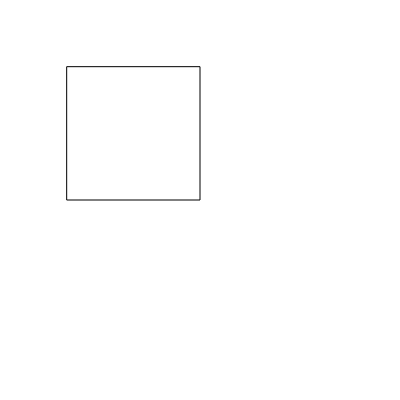

In [2]:
l=Lsys("F+F+F+F+")
l.render(length=200)

### ルール適用

ルールは文字列の配列で与えます。Before->Afterという表記で書きます。配列なのは複数ルールを適用するためです。ルールは、デフォルトでは５回適用されます。回数は引数で指定できます。apply_rule()を単体で呼ぶとルール適用後のテキストが取得できます。

下記の例では、FをF+Fに置き換えるので、
- F
- F+F
- F+F+F+F
- ...

と、ルール適用ごとに2の階乗で増えてきます。

左右の回転角を小さくしておくと円が書けますね。

F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F+F


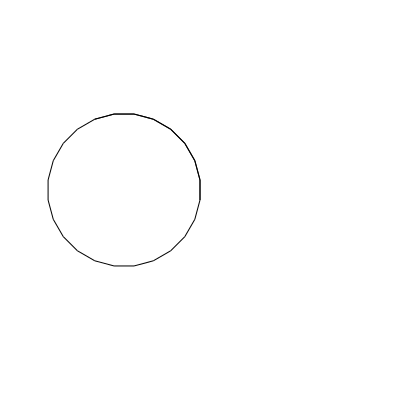

In [3]:
l=Lsys("F",["F->F+F"])
print l.apply_rule()
l.render(length=30,angle=15)

### Lsys.renderの引数と初期値

- iteration=5
ルールの適用回数
- length=20
進む距離
- angle=90
角度
- initial_pos= [0,0]
初期座標
- initial_angle=90
初期角度
- display=True
画面表示の有無


何もしない文字Xと複数ルールを組み合わせるとだいぶ複雑な図形が描けます。

FFX-FFXFFX-FFXX-XX-XFFX-FFX-FFXFFX-FFXX-XX-XFFXFFX-FFXFFX-FFXX-XX-XFFX-FFX-FFXFFX-FFXX-XX-XFFXX-XX-XFFX-X-XX-XFFXX-XX-XFFX-X-XX-XFFXFFX-FFXFFX-FFXX-XX-XFFX


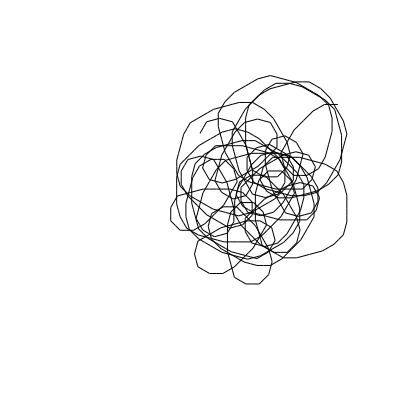

In [4]:
l=Lsys("X",["F->X-X","X->FFX"])
print l.apply_rule()
l.render(iteration=8,length=10,angle=15,initial_pos=[0,100])

display=Falseでレンダリングした後に、画像として取り出すことができます。svgwrite->CairoSVG->PILというまどろっこしい経路で配列に戻しています。

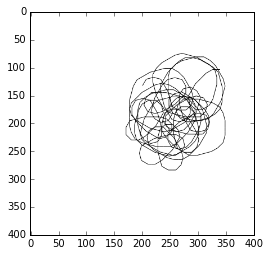

In [5]:
l=Lsys("X",["F->X-X","X->FFX"])
l.render(iteration=8,length=10,angle=15,initial_pos=[0,100],display=False)
im=l.get_img()

from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(im)

### 乱数の利用
length, angleには数字以外にも文字列を渡せます。文字列の場合、ノードごとにpythonの式として評価されます。
randomはインポートしてありますので、これを使うとステップごとに乱数で距離と角度を変えられます。

乱数を使わないで左右対称になる式を渡すと、木というより幾何的なものに見えてしまいますが、、、

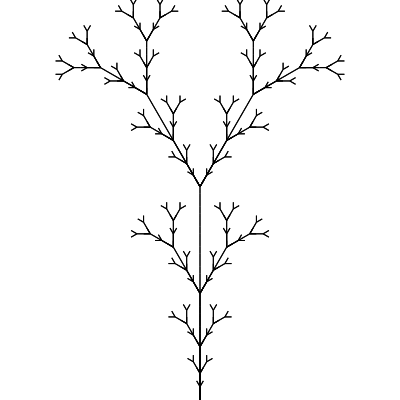

In [6]:
l=Lsys("X",["X->X[F+X][F-X]","F->FF"])
l.render(iteration=6,length="10", angle="30", initial_pos=[0,-300])

同じ式でも、長さと角度を乱数で振るだけでずいぶん自然なかんじになります。



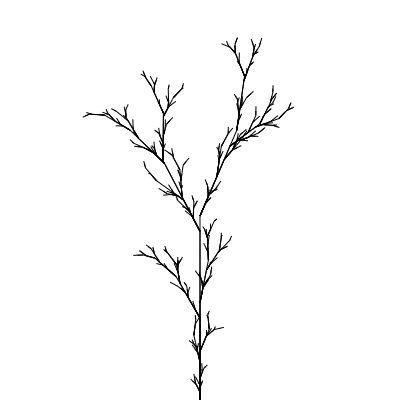

In [7]:
l.render(iteration=6,length="randint(1,15)", angle="randint(-50,50)*0.2+20", initial_pos=[0,-300])

実行するたびに異なる木が生成されるのが嫌な場合にはset_seedで乱数の種を指定します。

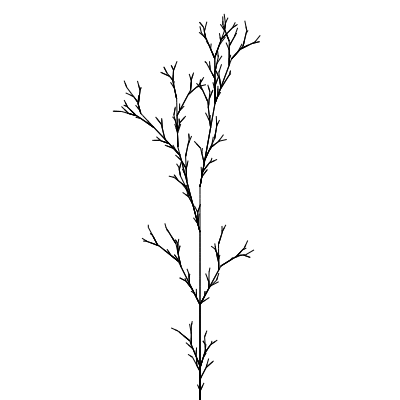

In [9]:
l=Lsys("X",["X->X[F+X][F-X]","F->FF"])
l.set_seed(0)
l.render(iteration=6,length="randint(1,15)", angle="randint(-50,50)*0.2+20", initial_pos=[0,-300])
im=l.get_img()

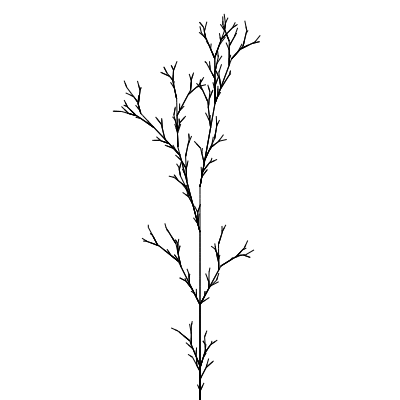

In [10]:
im